In [ ]:
!pip install spotipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.9 MB/s 
     |████████████████████████████████| 236 kB 68.6 MB/s 
     |████████████████████████████████| 140 kB 73.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
 !pip install scikit-learn>=1.0.0 TensorFlow>=2.7.0.

In [ ]:
pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 26 kB/s 
     |████████████████████████████████| 1.7 MB 80.2 MB/s 
     |████████████████████████████████| 439 kB 66.5 MB/s 
     |████████████████████████████████| 6.0 MB 76.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

# from keras import losses
# from keras.models import Sequential
# from keras.utils.generic_utils import has_arg
# from keras.utils.np_utils import to_categorical

# # isort: off
# from tensorflow.python.util.tf_export import keras_export
# from tensorflow.tools.docs import doc_controls


# # MLP for Pima Indians Dataset with 10-fold cross validation via sklearn
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# import numpy as np

#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pprint

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
cid = "068b6feac4594ae5b5ec862c8fd799a4"
secret = ""

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#korean hits
#spotify:playlist:37i9dQZF1DWT9uTRZAYj0
playlist_URI="37i9dQZF1DWT9uTRZAYj0c"
# #Best of korean soundtracks
playlist_URI="37i9dQZF1DWUXxc8Mc6MmJ"
#chill korean music
playlist_URI="3P23kTfVXOzo4voDEZLyCk"
#korean Top Hit 2022
playlist_URI="1ewMNWAr2hdYovIoJRxKJe"
#Kroean R&B/Chill/Soul
playlist_URI="3vQ7pF14wH2JTmlvGD4IUv"
#Calm Korean Songs
playlist_URI="4WXToYzngMGjbypV7xJWp1"
#Relaxing Korean Songs
playlist_URI= "778Cu7PmfARKCjsUTwj7iC"

playlist_URI= "5MlXXbvGHxZ5ep8AgWmSUr"

In [ ]:
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [ ]:
music_list = []

for track in sp.playlist_tracks(playlist_URI)["items"]:
  meta=sp.track(track["track"]["id"])
  features=sp.audio_features(track["track"]["id"])

  # meta
  name = meta['name']
  artist = meta['album']['artists'][0]['name']
  length = meta['duration_ms']
  ids =  meta['id']
  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  valence = features[0]['valence']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  key = features[0]['key']
  time_signature = features[0]['time_signature']
  audio_uri = features[0]['track_href']
  
  music_list.append([ids, name, artist, audio_uri, length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo])


In [ ]:
!gdown 1P9XpQDhNBo2mDAkyA7HCLQQJSsfGk7kq

Downloading...
From: https://drive.google.com/uc?id=1P9XpQDhNBo2mDAkyA7HCLQQJSsfGk7kq
To: /content/data_moods.csv
100% 118k/118k [00:00<00:00, 63.2MB/s]


In [ ]:
df = pd.read_csv('/content/data_moods.csv')

In [ ]:
col_features = df.columns[6:-3]
X= MinMaxScaler().fit_transform(df[col_features])
X2 = np.array(df[col_features])
Y = df['mood']

In [ ]:
X.shape

(686, 10)

In [ ]:
#Encode the categories
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)

In [ ]:
#Convert to  dummy (Not necessary in my case)

from keras.utils import np_utils
dummy_y = np_utils.to_categorical(encoded_y)

X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target
     

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [ ]:
# inputs = tf.keras.layers.Input(shape=(3,))
# output = tf.keras.layers.Dense(1, activation='sigmoid')(inputs)
# model1 = tf.keras.Model(inputs, output)

In [ ]:
# # Function to create model, required for KerasClassifier
# def create_model():
#  # create model
#  model = Sequential()
#  model.add(Dense(12, input_dim=8, activation='relu'))
#  model.add(Dense(8, activation='relu'))
#  model.add(Dense(1, activation='sigmoid'))
#  # Compile model
#  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#  return model

In [ ]:
def base_model():
    #Create the model
    model = Sequential()
    #Add 1 layer with 8 nodes,input of 4 dim with relu function
    model.add(Dense(8,input_dim=10,activation='relu'))
    #Add 1 layer with output 3 and softmax function
    model.add(Dense(4,activation='softmax'))
    #Compile the model using sigmoid loss function and adam optim
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])
    return model



In [ ]:
#Configure the model
estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=1)

<ipython-input-115-ba432526572c>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=1)


In [ ]:
#Evaluate the model using KFold cross validation
kfold = KFold(n_splits=10,shuffle=True,random_state= 15)
results = cross_val_score(estimator,X,encoded_y,cv=kfold)
error_score='raise'
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 218us/sample - loss: 1.5708 - acc: 0.2707
Epoch 2/300
617/617 [==============================] - 0s 15us/sample - loss: 1.5594 - acc: 0.2723
Epoch 3/300
617/617 [==============================] - 0s 18us/sample - loss: 1.5488 - acc: 0.2723
Epoch 4/300
617/617 [==============================] - 0s 19us/sample - loss: 1.5385 - acc: 0.2755
Epoch 5/300
617/617 [==============================] - 0s 19us/sample - loss: 1.5291 - acc: 0.2755
Epoch 6/300
617/617 [==============================] - 0s 18us/sample - loss: 1.5193 - acc: 0.2755
Epoch 7/300
617/617 [==============================] - 0s 17us/sample - loss: 1.5103 - acc: 0.2788
Epoch 8/300
617/617 [==============================] - 0s 15us/sample - loss: 1.5013 - acc: 0.2820
Epoch 9/300
617/617 [==============================] - 0s 30us/sample - loss: 1.4926 - acc: 0.2853
Epoch 10/300
617/617 [==============================] - 0s 17us/sample - loss: 1.4846 -

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 228us/sample - loss: 1.4092 - acc: 0.2998
Epoch 2/300
617/617 [==============================] - 0s 15us/sample - loss: 1.4005 - acc: 0.2982
Epoch 3/300
617/617 [==============================] - 0s 20us/sample - loss: 1.3920 - acc: 0.2982
Epoch 4/300
617/617 [==============================] - 0s 19us/sample - loss: 1.3836 - acc: 0.2966
Epoch 5/300
617/617 [==============================] - 0s 17us/sample - loss: 1.3753 - acc: 0.2950
Epoch 6/300
617/617 [==============================] - 0s 15us/sample - loss: 1.3672 - acc: 0.2950
Epoch 7/300
617/617 [==============================] - 0s 15us/sample - loss: 1.3595 - acc: 0.2950
Epoch 8/300
617/617 [==============================] - 0s 16us/sample - loss: 1.3520 - acc: 0.2950
Epoch 9/300
617/617 [==============================] - 0s 14us/sample - loss: 1.3448 - acc: 0.2950
Epoch 10/300
617/617 [==============================] - 0s 15us/sample - loss: 1.3379 -

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 206us/sample - loss: 1.4171 - acc: 0.2755
Epoch 2/300
617/617 [==============================] - 0s 18us/sample - loss: 1.4041 - acc: 0.2739
Epoch 3/300
617/617 [==============================] - 0s 17us/sample - loss: 1.3928 - acc: 0.2739
Epoch 4/300
617/617 [==============================] - 0s 14us/sample - loss: 1.3817 - acc: 0.2755
Epoch 5/300
617/617 [==============================] - 0s 13us/sample - loss: 1.3716 - acc: 0.2755
Epoch 6/300
617/617 [==============================] - 0s 15us/sample - loss: 1.3616 - acc: 0.2707
Epoch 7/300
617/617 [==============================] - 0s 14us/sample - loss: 1.3521 - acc: 0.2723
Epoch 8/300
617/617 [==============================] - 0s 14us/sample - loss: 1.3433 - acc: 0.2723
Epoch 9/300
617/617 [==============================] - 0s 16us/sample - loss: 1.3348 - acc: 0.2755
Epoch 10/300
617/617 [==============================] - 0s 16us/sample - loss: 1.3269 -

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 253us/sample - loss: 1.3942 - acc: 0.3047
Epoch 2/300
617/617 [==============================] - 0s 19us/sample - loss: 1.3801 - acc: 0.3160
Epoch 3/300
617/617 [==============================] - 0s 23us/sample - loss: 1.3669 - acc: 0.3241
Epoch 4/300
617/617 [==============================] - 0s 20us/sample - loss: 1.3543 - acc: 0.3258
Epoch 5/300
617/617 [==============================] - 0s 15us/sample - loss: 1.3420 - acc: 0.3355
Epoch 6/300
617/617 [==============================] - 0s 18us/sample - loss: 1.3301 - acc: 0.3404
Epoch 7/300
617/617 [==============================] - 0s 16us/sample - loss: 1.3182 - acc: 0.3598
Epoch 8/300
617/617 [==============================] - 0s 16us/sample - loss: 1.3068 - acc: 0.3760
Epoch 9/300
617/617 [==============================] - 0s 21us/sample - loss: 1.2956 - acc: 0.3938
Epoch 10/300
617/617 [==============================] - 0s 18us/sample - loss: 1.2844 -

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 249us/sample - loss: 1.5046 - acc: 0.2674
Epoch 2/300
617/617 [==============================] - 0s 25us/sample - loss: 1.4955 - acc: 0.2674
Epoch 3/300
617/617 [==============================] - 0s 25us/sample - loss: 1.4865 - acc: 0.2674
Epoch 4/300
617/617 [==============================] - 0s 21us/sample - loss: 1.4783 - acc: 0.2674
Epoch 5/300
617/617 [==============================] - 0s 20us/sample - loss: 1.4706 - acc: 0.2707
Epoch 6/300
617/617 [==============================] - 0s 25us/sample - loss: 1.4631 - acc: 0.2755
Epoch 7/300
617/617 [==============================] - 0s 37us/sample - loss: 1.4559 - acc: 0.2771
Epoch 8/300
617/617 [==============================] - 0s 21us/sample - loss: 1.4489 - acc: 0.2771
Epoch 9/300
617/617 [==============================] - 0s 17us/sample - loss: 1.4422 - acc: 0.2755
Epoch 10/300
617/617 [==============================] - 0s 22us/sample - loss: 1.4360 -

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 237us/sample - loss: 1.5003 - acc: 0.1118
Epoch 2/300
617/617 [==============================] - 0s 21us/sample - loss: 1.4919 - acc: 0.1232
Epoch 3/300
617/617 [==============================] - 0s 18us/sample - loss: 1.4841 - acc: 0.1313
Epoch 4/300
617/617 [==============================] - 0s 19us/sample - loss: 1.4766 - acc: 0.1410
Epoch 5/300
617/617 [==============================] - 0s 18us/sample - loss: 1.4694 - acc: 0.1507
Epoch 6/300
617/617 [==============================] - 0s 18us/sample - loss: 1.4625 - acc: 0.1588
Epoch 7/300
617/617 [==============================] - 0s 19us/sample - loss: 1.4559 - acc: 0.1653
Epoch 8/300
617/617 [==============================] - 0s 19us/sample - loss: 1.4495 - acc: 0.1718
Epoch 9/300
617/617 [==============================] - 0s 17us/sample - loss: 1.4435 - acc: 0.1767
Epoch 10/300
617/617 [==============================] - 0s 16us/sample - loss: 1.4377 -

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 618 samples
Epoch 1/300
618/618 [==============================] - 0s 224us/sample - loss: 1.3661 - acc: 0.2282
Epoch 2/300
618/618 [==============================] - 0s 14us/sample - loss: 1.3610 - acc: 0.2395
Epoch 3/300
618/618 [==============================] - 0s 15us/sample - loss: 1.3560 - acc: 0.2427
Epoch 4/300
618/618 [==============================] - 0s 20us/sample - loss: 1.3515 - acc: 0.2524
Epoch 5/300
618/618 [==============================] - 0s 25us/sample - loss: 1.3471 - acc: 0.2573
Epoch 6/300
618/618 [==============================] - 0s 16us/sample - loss: 1.3430 - acc: 0.2638
Epoch 7/300
618/618 [==============================] - 0s 16us/sample - loss: 1.3391 - acc: 0.2718
Epoch 8/300
618/618 [==============================] - 0s 20us/sample - loss: 1.3353 - acc: 0.2767
Epoch 9/300
618/618 [==============================] - 0s 15us/sample - loss: 1.3316 - acc: 0.2832
Epoch 10/300
618/618 [==============================] - 0s 15us/sample - loss: 1.3279 -

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 618 samples
Epoch 1/300
618/618 [==============================] - 0s 292us/sample - loss: 1.3374 - acc: 0.4288
Epoch 2/300
618/618 [==============================] - 0s 15us/sample - loss: 1.3288 - acc: 0.4434
Epoch 3/300
618/618 [==============================] - 0s 20us/sample - loss: 1.3203 - acc: 0.4353
Epoch 4/300
618/618 [==============================] - 0s 20us/sample - loss: 1.3122 - acc: 0.4417
Epoch 5/300
618/618 [==============================] - 0s 18us/sample - loss: 1.3037 - acc: 0.4450
Epoch 6/300
618/618 [==============================] - 0s 16us/sample - loss: 1.2956 - acc: 0.4482
Epoch 7/300
618/618 [==============================] - 0s 16us/sample - loss: 1.2875 - acc: 0.4563
Epoch 8/300
618/618 [==============================] - 0s 24us/sample - loss: 1.2797 - acc: 0.4563
Epoch 9/300
618/618 [==============================] - 0s 18us/sample - loss: 1.2714 - acc: 0.4628
Epoch 10/300
618/618 [==============================] - 0s 20us/sample - loss: 1.2630 -

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 618 samples
Epoch 1/300
618/618 [==============================] - 0s 351us/sample - loss: 1.5580 - acc: 0.2735
Epoch 2/300
618/618 [==============================] - 0s 31us/sample - loss: 1.5421 - acc: 0.2686
Epoch 3/300
618/618 [==============================] - 0s 60us/sample - loss: 1.5271 - acc: 0.2638
Epoch 4/300
618/618 [==============================] - 0s 57us/sample - loss: 1.5125 - acc: 0.2638
Epoch 5/300
618/618 [==============================] - 0s 32us/sample - loss: 1.4989 - acc: 0.2605
Epoch 6/300
618/618 [==============================] - 0s 59us/sample - loss: 1.4848 - acc: 0.2589
Epoch 7/300
618/618 [==============================] - 0s 60us/sample - loss: 1.4713 - acc: 0.2540
Epoch 8/300
618/618 [==============================] - 0s 58us/sample - loss: 1.4582 - acc: 0.2524
Epoch 9/300
618/618 [==============================] - 0s 62us/sample - loss: 1.4454 - acc: 0.2443
Epoch 10/300
618/618 [==============================] - 0s 38us/sample - loss: 1.4334 -

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 618 samples
Epoch 1/300
618/618 [==============================] - 0s 350us/sample - loss: 1.6161 - acc: 0.2087
Epoch 2/300
618/618 [==============================] - 0s 19us/sample - loss: 1.5967 - acc: 0.2055
Epoch 3/300
618/618 [==============================] - 0s 19us/sample - loss: 1.5778 - acc: 0.2023
Epoch 4/300
618/618 [==============================] - 0s 30us/sample - loss: 1.5611 - acc: 0.2023
Epoch 5/300
618/618 [==============================] - 0s 44us/sample - loss: 1.5455 - acc: 0.1942
Epoch 6/300
618/618 [==============================] - 0s 26us/sample - loss: 1.5298 - acc: 0.1909
Epoch 7/300
618/618 [==============================] - 0s 24us/sample - loss: 1.5151 - acc: 0.1828
Epoch 8/300
618/618 [==============================] - 0s 20us/sample - loss: 1.5013 - acc: 0.1748
Epoch 9/300
618/618 [==============================] - 0s 25us/sample - loss: 1.4888 - acc: 0.1715
Epoch 10/300
618/618 [==============================] - 0s 32us/sample - loss: 1.4764 -

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Baseline: 78.72% (4.10%)


In [ ]:
estimator.fit(X_train,Y_train)
y_preds = estimator.predict(X_test)

Train on 548 samples
Epoch 1/300
548/548 [==============================] - 1s 1ms/sample - loss: 1.3426 - acc: 0.3376
Epoch 2/300
548/548 [==============================] - 0s 37us/sample - loss: 1.3323 - acc: 0.3595
Epoch 3/300
548/548 [==============================] - 0s 37us/sample - loss: 1.3221 - acc: 0.3850
Epoch 4/300
548/548 [==============================] - 0s 26us/sample - loss: 1.3124 - acc: 0.4015
Epoch 5/300
548/548 [==============================] - 0s 45us/sample - loss: 1.3025 - acc: 0.4252
Epoch 6/300
548/548 [==============================] - 0s 25us/sample - loss: 1.2929 - acc: 0.4507
Epoch 7/300
548/548 [==============================] - 0s 38us/sample - loss: 1.2837 - acc: 0.4562
Epoch 8/300
548/548 [==============================] - 0s 48us/sample - loss: 1.2746 - acc: 0.4872
Epoch 9/300
548/548 [==============================] - 0s 41us/sample - loss: 1.2662 - acc: 0.4982
Epoch 10/300
548/548 [==============================] - 0s 47us/sample - loss: 1.2568 - a

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


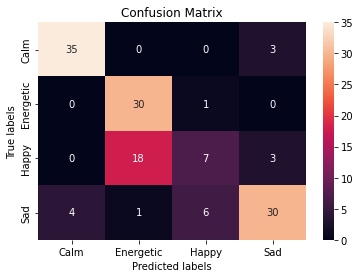

Accuracy Score 0.7391304347826086


In [ ]:
cm = confusion_matrix(Y_test,y_preds)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(Y_test,y_preds))

In [ ]:
music_list

[['3SfbB0Y3saMIQnNctxMVhj',
  'I Miss You',
  'SOYOU',
  'spotify:track:3SfbB0Y3saMIQnNctxMVhj',
  169448,
  0.482,
  0.901,
  0.344,
  0,
  0.129,
  0.211,
  -6.002,
  0.0318,
  133.499],
 ['1HYzRuWjmS9LXCkdVHi25K',
  'Stay With Me',
  'CHANYEOL',
  'spotify:track:1HYzRuWjmS9LXCkdVHi25K',
  192441,
  0.558,
  0.431,
  0.526,
  0,
  0.126,
  0.202,
  -4.686,
  0.033,
  124.709],
 ['12nafIbZ2LAVfht3WMy33b',
  'The Best Present (Prod. by PSY)',
  'Rain',
  'spotify:track:12nafIbZ2LAVfht3WMy33b',
  239416,
  0.583,
  0.302,
  0.66,
  0,
  0.13,
  0.298,
  -3.36,
  0.0332,
  148.234],
 ['1Bb6jVrsg8cXxMCBxIWJUn',
  'Through the Night',
  'IU',
  'spotify:track:1Bb6jVrsg8cXxMCBxIWJUn',
  253293,
  0.401,
  0.754,
  0.311,
  0,
  0.279,
  0.282,
  -7.327,
  0.0437,
  79.197],
 ['3y7ByLZ05tluscOTRgEJ9Y',
  'Palette (feat. G-DRAGON)',
  'IU',
  'spotify:track:3y7ByLZ05tluscOTRgEJ9Y',
  217412,
  0.804,
  0.458,
  0.68,
  0,
  0.102,
  0.62,
  -3.81,
  0.2,
  102.013],
 ['2XJOdcqQnB4dpi0mTxmzC9'

In [ ]:
test_df=pd.DataFrame(music_list, columns=["id","name","artist","audio_uri","length",'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo'])
test_df=test_df.drop_duplicates(subset=["id"])
test_features=test_df.columns[4:]
X_test= MinMaxScaler().fit_transform(test_df[test_features])
X_test = np.array(X_test)
     

In [ ]:
result=pd.concat([test_df,pd.DataFrame(estimator.predict_proba(X_test))],axis=1)
result.rename(columns={0:"Calm",1:"Energetic",2:"Happy",3:"Sad"},inplace=True)

In [ ]:
result['Emotion'] = result.loc[:,['Calm','Happy','Energetic','Sad']].max(axis=1)

In [ ]:
happy_list = list(result.Happy)

for v in range(0,len(result.Emotion)):
  if result.loc[v,'Emotion'] == happy_list[v]:
    result.loc[v,'Emotion'] = 'Happy'

In [ ]:
sad_list = list(result.Sad)

for v in range(0,len(result.Emotion)):
  if result.loc[v,'Emotion'] == sad_list[v]:
    result.loc[v,'Emotion'] = 'Calm'

In [ ]:
result

,id,name,artist,audio_uri,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,Calm,Energetic,Happy,Sad,Emotion
0,3SfbB0Y3saMIQnNctxMVhj,I Miss You,SOYOU,https://api.spotify.com/v1/tracks/3SfbB0Y3saMI...,169448,0.482,0.901,0.344,0.000000,0.1290,0.211,-6.002,0.0318,133.499,0.023106,0.003328,0.030224,0.943342,Calm
1,1HYzRuWjmS9LXCkdVHi25K,Stay With Me,CHANYEOL,https://api.spotify.com/v1/tracks/1HYzRuWjmS9L...,192441,0.558,0.431,0.526,0.000000,0.1260,0.202,-4.686,0.0330,124.709,0.003598,0.078719,0.174396,0.743286,Calm
2,12nafIbZ2LAVfht3WMy33b,The Best Present (Prod. by PSY),Rain,https://api.spotify.com/v1/tracks/12nafIbZ2LAV...,239416,0.583,0.302,0.660,0.000000,0.1300,0.298,-3.360,0.0332,148.234,0.000438,0.131686,0.267767,0.600109,Calm
3,1Bb6jVrsg8cXxMCBxIWJUn,Through the Night,IU,https://api.spotify.com/v1/tracks/1Bb6jVrsg8cX...,253293,0.401,0.754,0.311,0.000000,0.2790,0.282,-7.327,0.0437,79.197,0.009600,0.002800,0.034200,0.953400,Calm
4,3y7ByLZ05tluscOTRgEJ9Y,Palette (feat. G-DRAGON),IU,https://api.spotify.com/v1/tracks/3y7ByLZ05tlu...,217412,0.804,0.458,0.680,0.000000,0.1020,0.620,-3.810,0.2000,102.013,0.000246,0.187786,0.623969,0.188000,0.623969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,4FObSSNE4O4dgzD4iHFprW,"How can I love the heartbreak, you`re the one ...",AKMU,https://api.spotify.com/v1/tracks/4FObSSNE4O4d...,290095,0.520,0.910,0.248,0.000001,0.1180,0.228,-8.675,0.0355,129.205,0.009957,0.000187,0.008893,0.980963,Calm
91,7fftC401ke4BzA3ucPIXES,All about you,TAEYEON,https://api.spotify.com/v1/tracks/7fftC401ke4B...,209482,0.531,0.915,0.287,0.000000,0.1180,0.491,-7.091,0.0364,135.550,0.008555,0.001152,0.033904,0.956389,Calm
92,3ySSbGT5BepfePnva86js7,Letter,Jukjae,https://api.spotify.com/v1/tracks/3ySSbGT5Bepf...,211602,0.782,0.637,0.348,0.000437,0.1260,0.576,-8.798,0.3260,141.839,0.011494,0.051893,0.471551,0.465063,0.471551
93,6O4S5bDDOrhnHcVkwyAx1L,study abroad (Feat. Han-All),CRUCiAL STAR,https://api.spotify.com/v1/tracks/6O4S5bDDOrhn...,232544,0.770,0.816,0.497,0.000000,0.0763,0.235,-6.937,0.0293,114.991,0.006454,0.002046,0.047180,0.944320,Calm


In [ ]:
calm_list = list(result.Calm)

for v in range(0,len(result.Emotion)):
  if result.loc[v,'Emotion'] == calm_list[v]:
    result.loc[v,'Emotion'] = 'Calm'

In [ ]:
result

,id,name,artist,audio_uri,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,Calm,Energetic,Happy,Sad,Emotion
0,3SfbB0Y3saMIQnNctxMVhj,I Miss You,SOYOU,https://api.spotify.com/v1/tracks/3SfbB0Y3saMI...,169448,0.482,0.901,0.344,0.000000,0.1290,0.211,-6.002,0.0318,133.499,0.023106,0.003328,0.030224,0.943342,Calm
1,1HYzRuWjmS9LXCkdVHi25K,Stay With Me,CHANYEOL,https://api.spotify.com/v1/tracks/1HYzRuWjmS9L...,192441,0.558,0.431,0.526,0.000000,0.1260,0.202,-4.686,0.0330,124.709,0.003598,0.078719,0.174396,0.743286,Calm
2,12nafIbZ2LAVfht3WMy33b,The Best Present (Prod. by PSY),Rain,https://api.spotify.com/v1/tracks/12nafIbZ2LAV...,239416,0.583,0.302,0.660,0.000000,0.1300,0.298,-3.360,0.0332,148.234,0.000438,0.131686,0.267767,0.600109,Calm
3,1Bb6jVrsg8cXxMCBxIWJUn,Through the Night,IU,https://api.spotify.com/v1/tracks/1Bb6jVrsg8cX...,253293,0.401,0.754,0.311,0.000000,0.2790,0.282,-7.327,0.0437,79.197,0.009600,0.002800,0.034200,0.953400,Calm
4,3y7ByLZ05tluscOTRgEJ9Y,Palette (feat. G-DRAGON),IU,https://api.spotify.com/v1/tracks/3y7ByLZ05tlu...,217412,0.804,0.458,0.680,0.000000,0.1020,0.620,-3.810,0.2000,102.013,0.000246,0.187786,0.623969,0.188000,0.623969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,4FObSSNE4O4dgzD4iHFprW,"How can I love the heartbreak, you`re the one ...",AKMU,https://api.spotify.com/v1/tracks/4FObSSNE4O4d...,290095,0.520,0.910,0.248,0.000001,0.1180,0.228,-8.675,0.0355,129.205,0.009957,0.000187,0.008893,0.980963,Calm
91,7fftC401ke4BzA3ucPIXES,All about you,TAEYEON,https://api.spotify.com/v1/tracks/7fftC401ke4B...,209482,0.531,0.915,0.287,0.000000,0.1180,0.491,-7.091,0.0364,135.550,0.008555,0.001152,0.033904,0.956389,Calm
92,3ySSbGT5BepfePnva86js7,Letter,Jukjae,https://api.spotify.com/v1/tracks/3ySSbGT5Bepf...,211602,0.782,0.637,0.348,0.000437,0.1260,0.576,-8.798,0.3260,141.839,0.011494,0.051893,0.471551,0.465063,0.471551
93,6O4S5bDDOrhnHcVkwyAx1L,study abroad (Feat. Han-All),CRUCiAL STAR,https://api.spotify.com/v1/tracks/6O4S5bDDOrhn...,232544,0.770,0.816,0.497,0.000000,0.0763,0.235,-6.937,0.0293,114.991,0.006454,0.002046,0.047180,0.944320,Calm


In [ ]:
result_calm = result[result['Emotion'] == 'Calm']
# result_sad = result[result['Emotion'] == 'Sad']
# result_energetic = result[result['Emotion'] == 'Energetic']

In [ ]:
def make_20_list(emotion):
  temp_data=result_calm.loc[:,["name","artist","id","audio_uri"]]
  return temp_data[:20]

for emotion in ["Calm_href"]:
  make_20_list(emotion).to_csv(f"./{emotion}.txt",index=False,header=False)

In [ ]:
result_happy

,id,name,artist,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,Calm,Energetic,Happy,Sad,Emotion
3,6tCd8bPvYnceDG7W9M1RMk,Shut Down,BLACKPINK,175889,0.813,0.00269,0.657,0.000000,0.1830,0.651,-6.447,0.0372,110.053,0.001703,0.289542,0.580462,0.128293,Happy
4,1IthE5GNiRzFN5CVaCa445,Born Singer,BTS,238628,0.602,0.03540,0.841,0.000000,0.2350,0.684,-3.334,0.1090,157.937,0.000461,0.416222,0.487774,0.095543,Happy
6,7EyhPjrJzjx0fk2i7vUJCS,Pink Venom,BLACKPINK,186964,0.794,0.01190,0.719,0.000000,0.2760,0.690,-7.227,0.0761,90.016,0.000732,0.304998,0.604328,0.089942,Happy
12,0Q5VnK2DYzRyfqQRJuUtvi,LOVE DIVE,IVE,177186,0.703,0.00379,0.709,0.000054,0.3330,0.538,-4.169,0.0433,117.941,0.001943,0.431404,0.474650,0.092004,Happy
19,2ZMkjvuOQOD9HLplTDjbTA,XOXO,JEON SOMI,207650,0.703,0.07050,0.611,0.000000,0.1330,0.527,-6.376,0.0313,144.991,0.005657,0.247199,0.448118,0.299026,Happy
27,5oH4DQAuu1J1800RzUsBWa,That That (prod. & feat. SUGA of BTS),PSY,174646,0.905,0.02990,0.962,0.000000,0.0272,0.906,-3.197,0.0856,129.969,0.000133,0.411481,0.560729,0.027656,Happy
29,2KZ3sNqPogEyMUUH6A5HFy,LALISA,LISA,200689,0.804,0.02670,0.652,0.000782,0.1180,0.854,-6.282,0.0898,150.076,0.001641,0.172054,0.712589,0.113716,Happy
30,56LqkD3OYkPEciGaXvMtkr,Butter,BTS,164441,0.759,0.00323,0.459,0.000000,0.0906,0.695,-5.187,0.0948,109.997,0.004236,0.372937,0.448257,0.174570,Happy
32,4t2FIqZJORKZGSKg30SShr,NAKKA (with IU),AKMU,212807,0.816,0.07320,0.636,0.000028,0.1180,0.499,-6.950,0.1010,100.923,0.003660,0.338102,0.458878,0.199361,Happy
33,0LThjFY2iTtNdd4wviwVV2,Permission to Dance,BTS,187585,0.702,0.00544,0.741,0.000000,0.3370,0.646,-5.330,0.0427,124.925,0.000909,0.343922,0.564306,0.090863,Happy


In [ ]:
def make_20_list(emotion):
  temp_data=result_happy.loc[:,["name","artist"]]
  sep = ('/t')
  return temp_data[:20]

for emotion in ["Happy"]:
  make_20_list(emotion).to_csv(f"./{emotion}.txt",index=False,header=False)

In [ ]:
result_sad

,id,name,artist,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,Calm,Energetic,Happy,Sad,Emotion
0,3GvxLP0rUrPbBTMhOrYEUD,You’re World,Various Artists,216266,0.709,0.578,0.557,0.000165,0.1720,0.734,-6.048,0.0259,109.961,0.035579,0.116594,0.223926,0.623900,Sad
1,5bN1ltT5BhVMnszmgsqGD5,Perhaps Love (사랑인가요) (Prod.By 박근태),"에릭남 (Eric Nam), CHEEZE (치즈)",239099,0.525,0.300,0.445,0.000000,0.1210,0.258,-8.480,0.0295,83.997,0.170498,0.100293,0.125057,0.604152,Sad
2,2HrzH60nFePfGF5RqFK5YW,Like You,So Soo Bin,205437,0.799,0.670,0.298,0.000000,0.1180,0.629,-6.290,0.0347,103.032,0.055490,0.013796,0.038534,0.892180,Sad
3,5TukPlV2eJWX7lfQAbrZGV,"Attraction (Bunny and Guys X Eric Nam, NAEUN)",Eric Nam,207760,0.667,0.641,0.598,0.000000,0.1430,0.348,-6.369,0.0269,100.048,0.109660,0.059730,0.101744,0.728866,Sad
5,3PtqREMenHuD7pKYg91JIs,Wish Ur My Love,Various Artists,290253,0.636,0.597,0.629,0.000000,0.0866,0.425,-5.861,0.0268,94.016,0.039326,0.022866,0.062264,0.875544,Sad
6,6YOXdy9jShw66iOnBzQMKv,봄인가 봐 Spring Love,WENDY,198749,0.680,0.723,0.391,0.000000,0.1070,0.419,-6.906,0.0357,82.861,0.171905,0.017370,0.032952,0.777773,Sad
13,3U5ti2dwp5FA70lZPrhv9l,NOBODY,Blue.D,201183,0.686,0.566,0.426,0.000000,0.2990,0.491,-7.134,0.0437,88.626,0.072503,0.096125,0.160817,0.670555,Sad
14,1FaHB2AIWGiStlMh4jS6QQ,"Love, This",LAS,192000,0.723,0.464,0.679,0.000000,0.1350,0.395,-4.567,0.0371,102.044,0.034314,0.210614,0.315141,0.439930,Sad
15,5Rys2WgRdbvQNdeezDvUql,My Romance,CHEEZE,173870,0.710,0.826,0.238,0.000000,0.1460,0.437,-8.557,0.0345,93.935,0.391551,0.010427,0.015759,0.582263,Sad
18,71fbjN2UQSgcEITeza9wib,LOVE,Lyn,234481,0.625,0.419,0.744,0.000000,0.1220,0.416,-4.558,0.0506,83.952,0.035909,0.236822,0.321292,0.405976,Sad


In [ ]:
def make_20_list(emotion):
  temp_data=result_sad.loc[:,["name","artist"]]
  return temp_data[:20]

for emotion in ["Sad"]:
  make_20_list(emotion).to_csv(f"./{emotion}.txt",index=False,header=False)

In [ ]:
result_energetic

,id,name,artist,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,Calm,Energetic,Happy,Sad,Emotion
0,10SRMwb9EuVS1K9rYsBfHQ,Yet To Come,BTS,193593,0.559,0.04320,0.885,0.000000,0.3330,0.683,-4.515,0.1890,172.029,0.000437,0.637504,0.335472,0.026588,Energetic
1,3UHPGOkUcE4hE7sqBF4Snt,Film out,BTS,214620,0.499,0.29600,0.709,0.000000,0.3310,0.314,-6.404,0.1340,164.032,0.018470,0.435456,0.228517,0.317557,Energetic
5,2WoluqyWzsgRmFCeHeGlnm,SNEAKERS,ITZY,179453,0.935,0.01920,0.849,0.000000,0.0223,0.551,-3.047,0.0779,119.986,0.000957,0.528673,0.422096,0.048274,Energetic
7,0mBP9X2gPCuapvpZ7TGDk3,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,154486,0.881,0.61900,0.592,0.000013,0.0901,0.719,-4.898,0.0324,101.058,0.030492,0.354922,0.261193,0.353393,Energetic
11,7CAdT0HdiQNlt1C7xk2hep,Stay Alive (Prod. SUGA of BTS),Jung Kook,210928,0.512,0.29900,0.760,0.000000,0.1030,0.495,-5.889,0.0682,130.096,0.012736,0.350275,0.310184,0.326805,Energetic
14,7n2FZQsaLb7ZRfRPfEeIvr,ELEVEN,IVE,178453,0.828,0.06170,0.731,0.000000,0.0480,0.587,-3.033,0.1110,119.978,0.001910,0.566860,0.357130,0.074099,Energetic
18,0IGUXY4JbK18bu9oD4mPIm,TOMBOY,(G)I-DLE,174386,0.755,0.00988,0.870,0.000000,0.0917,0.645,-2.414,0.0936,124.032,0.000622,0.555200,0.406762,0.037417,Energetic
20,5b8FtevTVz8xVF6E208xeV,LOCO,ITZY,191462,0.764,0.01090,0.886,0.000022,0.3250,0.497,-3.067,0.1770,102.012,0.000581,0.631730,0.337710,0.029978,Energetic
21,7rXcCpIAoOUCydkVDMcoPV,INVU,TAEYEON,204973,0.599,0.09110,0.816,0.000002,0.0961,0.399,-3.412,0.0556,106.962,0.005191,0.464622,0.356836,0.173351,Energetic
28,2g0LdZQce9xlcHb1mBJyuz,strawberry moon,IU,205333,0.475,0.13800,0.712,0.000000,0.0936,0.443,-3.306,0.0431,169.796,0.013565,0.387245,0.272663,0.326527,Energetic


In [ ]:
def make_20_list(emotion):
  temp_data=result_sad.loc[:,["name","artist","id"]]
  return temp_data[:20]

for emotion in ["Sad_id"]:
  make_20_list(emotion).to_csv(f"./{emotion}.txt",index=False,header=False)